In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(ccancer)

In [3]:
str(ccancer)

'data.frame':	30 obs. of  5 variables:
 $ Count     : int  3500 1250 0 1600 540 2400 1050 2100 0 590 ...
 $ Gender    : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 1 1 1 1 ...
 $ Region    : Factor w/ 3 levels "Newfoundland",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Site      : Factor w/ 5 levels "Breast","Colorectal",..: 3 2 1 5 4 3 2 1 5 4 ...
 $ Population: int  11874400 11874400 11874400 11874400 11874400 11874400 11874400 11874400 11874400 11874400 ...


# Nho phai them Zeros Sampling

In [4]:
ccancer

Count,Gender,Region,Site,Population
3500,M,Ontario,Lung,11874400
1250,M,Ontario,Colorectal,11874400
0,M,Ontario,Breast,11874400
1600,M,Ontario,Prostate,11874400
540,M,Ontario,Pancreas,11874400
2400,F,Ontario,Lung,11874400
1050,F,Ontario,Colorectal,11874400
2100,F,Ontario,Breast,11874400
0,F,Ontario,Prostate,11874400
590,F,Ontario,Pancreas,11874400


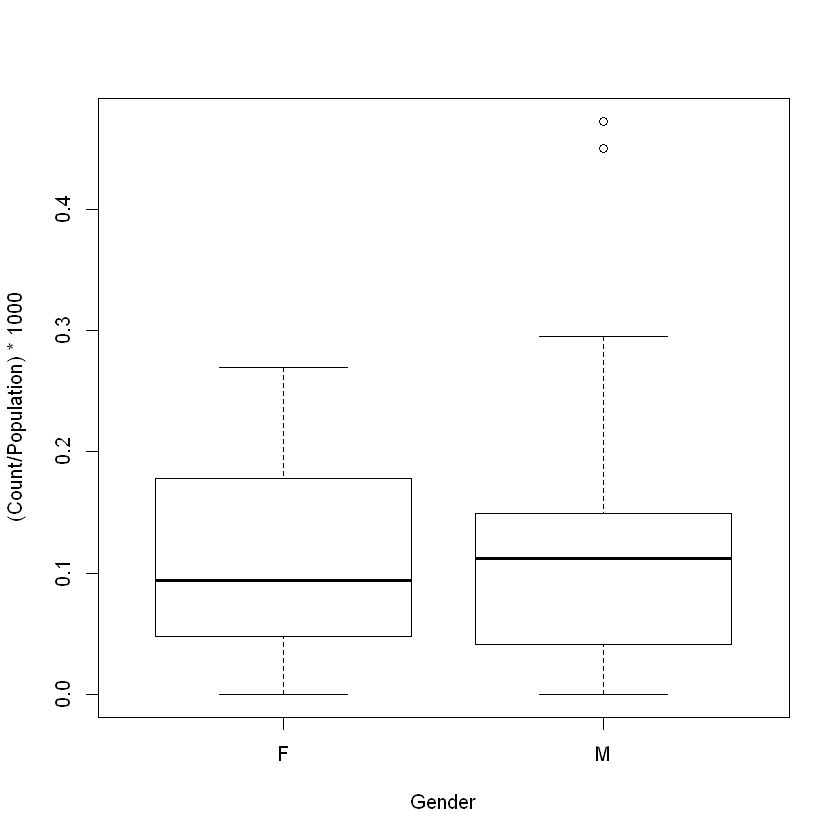

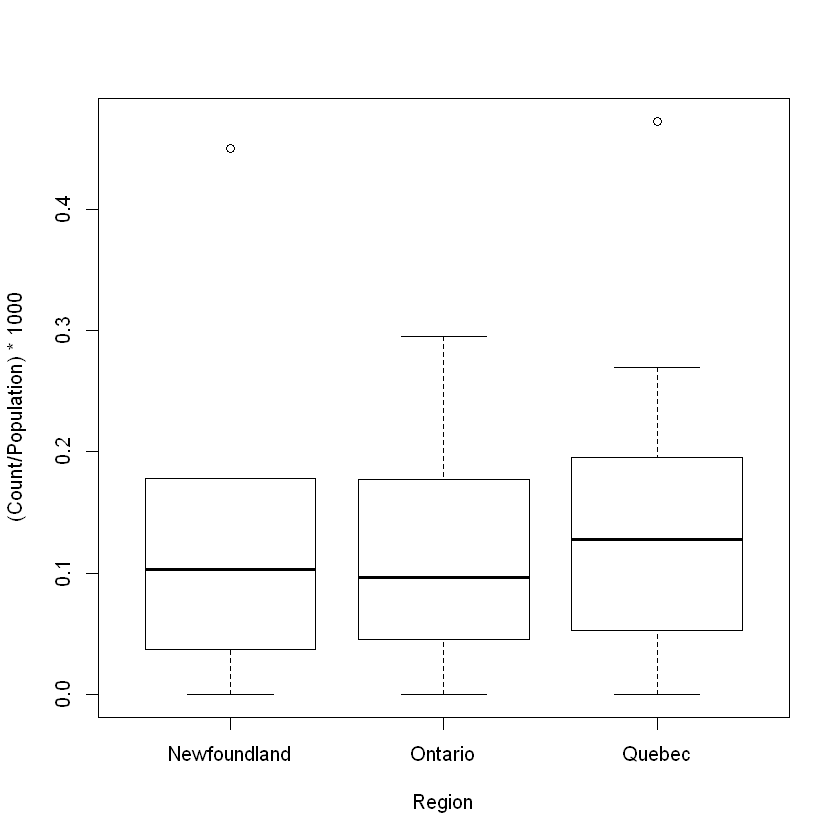

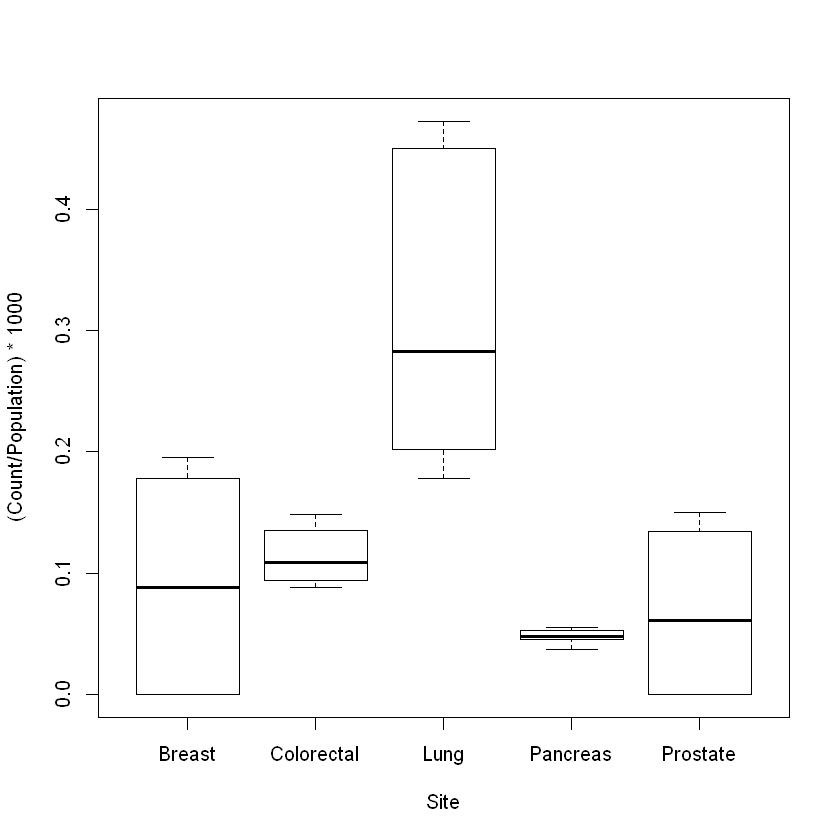

In [5]:
plot((Count/Population)*1000 ~ Gender, data=ccancer, pch=ifelse(Gender=="M", 1, 19))
plot((Count/Population)*1000 ~ Region, data=ccancer)
plot((Count/Population)*1000 ~ Site, data=ccancer)

Y hai chua ro :(

In [6]:
glm.1 <- glm(Count ~ offset(log(Population)) + Gender + Region + Site, data=ccancer, family = poisson(link="log"))

In [7]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-9.3657839,0.04224999,-221.675398,0.000000e+00
GenderM,0.1570000,0.01283133,12.235672,2.004395e-34
RegionOntario,-0.1268962,0.03975557,-3.191911,1.413349e-03
RegionQuebec,0.1522420,0.03995976,3.809883,1.390323e-04
SiteColorectal,0.2129408,0.02227280,9.560574,1.171059e-21
SiteLung,1.1692195,0.01896216,61.660669,0.000000e+00
SitePancreas,-0.6127880,0.02794061,-21.931807,1.291946e-106
SiteProstate,-0.3455670,0.02572830,-13.431397,3.958718e-41


In [8]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,29,20782.576,NA
Gender,1,150.1733,28,20632.403,1.588878e-34
Region,2,453.5278,26,20178.875,3.293708e-99
Site,4,10803.0287,22,9375.846,0.000000e+00


In [9]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 0

[1] 0

[1] 426.1748

[1] 323.6866

In [10]:
glm.quasi <- glm(Count ~ offset(log(Population)) + Gender + Region + Site, data=ccancer, family = quasipoisson(link="log"))

In [11]:
coef(summary(glm.quasi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-9.3657839,0.7601320,-12.3212596,2.389611e-11
GenderM,0.1570000,0.2308522,0.6800885,5.035429e-01
RegionOntario,-0.1268962,0.7152541,-0.1774142,8.608064e-01
RegionQuebec,0.1522420,0.7189278,0.2117626,8.342418e-01
SiteColorectal,0.2129408,0.4007166,0.5314000,6.004665e-01
SiteLung,1.1692195,0.3411538,3.4272504,2.409295e-03
SitePancreas,-0.6127880,0.5026876,-1.2190233,2.357453e-01
SiteProstate,-0.3455670,0.4628853,-0.7465498,4.632393e-01


In [12]:
anova(glm.quasi, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,29,20782.576,NA,NA
Gender,1,150.1733,28,20632.403,0.4639464,0.5028925822
Region,2,453.5278,26,20178.875,0.7005662,0.5070419504
Site,4,10803.0287,22,9375.846,8.3437399,0.0002969714



	Shapiro-Wilk normality test

data:  qresid(glm.quasi)
W = 0.8939, p-value = 0.005975


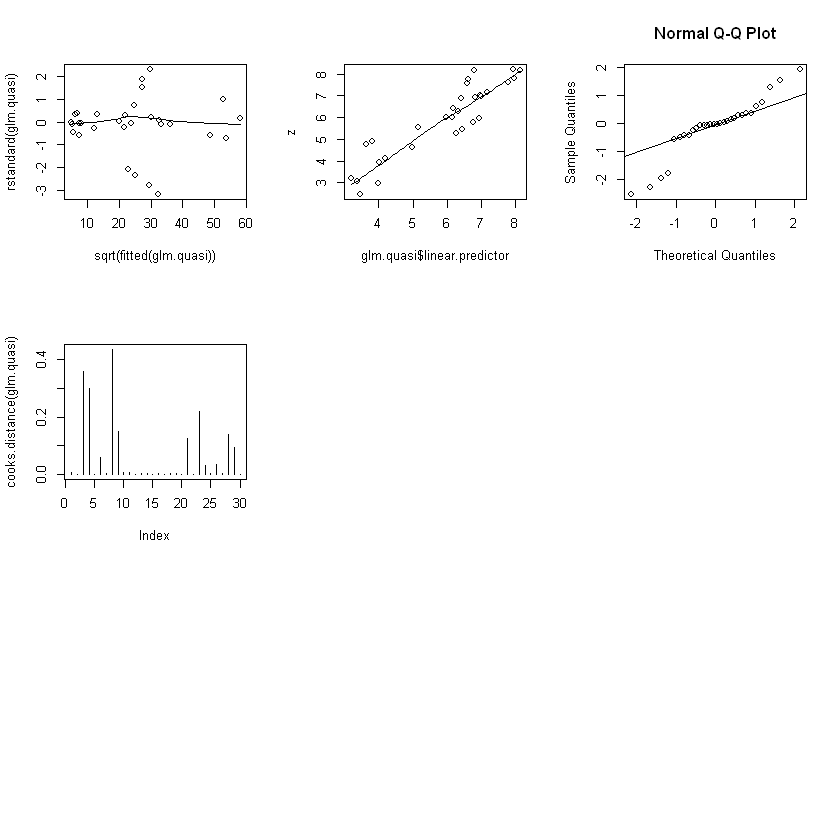

In [13]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.quasi) ~ sqrt(fitted(glm.quasi)))
z <- resid(glm.quasi, type="working") + glm.quasi$linear.predictor
scatter.smooth(z ~ glm.quasi$linear.predictor)
qqnorm(qresid(glm.quasi))
qqline(qresid(glm.quasi))
plot(cooks.distance(glm.quasi), type="h")
shapiro.test(qresid(glm.quasi))

In [14]:
colSums(influence.measures(glm.quasi)$is.inf)

dfb.1_ dfb.GndM dfb.RgnO dfb.RgnQ dfb.StCl dfb.StLn dfb.StPn dfb.StPr 
       0        0        0        0        2        3        1        3 
   dffit    cov.r   cook.d      hat 
       2        8        0        0

In [15]:
rowSums(influence.measures(glm.quasi)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  5  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  4  0  0  1 
27 28 29 30 
 0  0  0  0

In [16]:
wc <- subset(ccancer, Site!="Breast")
wc <- subset(wc, !(Site=="Prostate" & Gender=="F"))

In [17]:
xtabs(Count~Gender+Site, data=wc)

      Site
Gender Breast Colorectal Lung Pancreas Prostate
     F      0       2100 4495     1025        0
     M      0       2410 7240      950     2580

In [18]:
glm.1 <- glm(Count ~ offset(log(Population)) + Gender + Region + Site, data=wc, family = poisson(link="log"))

In [19]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-9.24253951,0.04477038,-206.4431655,0.000000e+00
GenderM,0.33007763,0.01501910,21.9771984,4.759413e-107
RegionOntario,-0.14848864,0.04296367,-3.4561442,5.479621e-04
RegionQuebec,0.16150136,0.04314989,3.7427993,1.819816e-04
SiteLung,0.95627868,0.01751984,54.5826268,0.000000e+00
SitePancreas,-0.82572876,0.02698256,-30.6023127,1.140243e-205
SiteProstate,-0.01684186,0.02547118,-0.6612124,5.084761e-01


In [20]:
anova(glm.1, test="F")

Warning message in anova.glm(glm.1, test = "F"):
"using F test with a 'poisson' family is inappropriate"

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,20,9740.8743,NA,NA
Gender,1,333.8251,19,9407.0492,333.8251,1.411504e-74
Region,2,477.1475,17,8929.9017,238.5737,2.447637e-104
Site,3,8555.5982,14,374.3036,2851.8661,0.000000e+00
